# Define dataset

In [1]:
from esa_climate_toolbox.core import open_data

In [2]:
dataset, id = open_data('ESACCI-L3C_SNOW-SWE-1979-2020-fv2.0.zarr')

In [3]:
dataset

<xarray.Dataset> Size: 823GB
Dimensions:   (time: 7934, lat: 1800, lon: 3600, nv: 2)
Coordinates:
  * lat       (lat) float64 14kB -89.95 -89.85 -89.75 ... 89.75 89.85 89.95
    lat_bnds  (lat, nv) float64 29kB dask.array<chunksize=(900, 2), meta=np.ndarray>
  * lon       (lon) float64 29kB -179.9 -179.8 -179.8 ... 179.7 179.8 179.9
    lon_bnds  (lon, nv) float64 58kB dask.array<chunksize=(900, 2), meta=np.ndarray>
  * time      (time) datetime64[ns] 63kB 1979-01-02 1979-01-04 ... 2020-05-24
Dimensions without coordinates: nv
Data variables:
    swe       (time, lat, lon) float64 411GB dask.array<chunksize=(10, 900, 900), meta=np.ndarray>
    swe_std   (time, lat, lon) float64 411GB dask.array<chunksize=(10, 900, 900), meta=np.ndarray>
Attributes: (12/43)
    Conventions:                CF-1.9
    cdm_data_type:              grid
    comment:                    The following auxiliary datasets are used for...
    creator_email:              kari.luojus@fmi.fi (Scientific and Production...
    creator_name:               Finnish Meteorological Institute
    creator_url:                www.fmi.fi
    ...                         ...
    time_coverage_duration:     P1D
    time_coverage_end:          20200524T000000Z
    time_coverage_resolution:   P1D
    time_coverage_start:        19790102T000000Z
    title:                      ESA CCI snow SWE product level L3C daily, Dyn...
    tracking_id:                25063fb5-47ad-424a-8f26-29bdf35efb78

In [4]:
print(dataset)

<xarray.Dataset> Size: 823GB
Dimensions:   (time: 7934, lat: 1800, lon: 3600, nv: 2)
Coordinates:
  * lat       (lat) float64 14kB -89.95 -89.85 -89.75 ... 89.75 89.85 89.95
    lat_bnds  (lat, nv) float64 29kB dask.array<chunksize=(900, 2), meta=np.ndarray>
  * lon       (lon) float64 29kB -179.9 -179.8 -179.8 ... 179.7 179.8 179.9
    lon_bnds  (lon, nv) float64 58kB dask.array<chunksize=(900, 2), meta=np.ndarray>
  * time      (time) datetime64[ns] 63kB 1979-01-02 1979-01-04 ... 2020-05-24
Dimensions without coordinates: nv
Data variables:
    swe       (time, lat, lon) float64 411GB dask.array<chunksize=(10, 900, 900), meta=np.ndarray>
    swe_std   (time, lat, lon) float64 411GB dask.array<chunksize=(10, 900, 900), meta=np.ndarray>
Attributes: (12/43)
    Conventions:                CF-1.9
    cdm_data_type:              grid
    comment:                    The following auxiliary datasets are used for...
    creator_email:              kari.luojus@fmi.fi (Scientific and Productio

In [5]:
%matplotlib inline
import xarray as xr
import matplotlib.pyplot as plt

swe_da = dataset["swe"]
swe_da

<xarray.DataArray 'swe' (time: 7934, lat: 1800, lon: 3600)> Size: 411GB
dask.array<open_dataset-swe, shape=(7934, 1800, 3600), dtype=float64, chunksize=(10, 900, 900), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 14kB -89.95 -89.85 -89.75 ... 89.75 89.85 89.95
  * lon      (lon) float64 29kB -179.9 -179.8 -179.8 ... 179.7 179.8 179.9
  * time     (time) datetime64[ns] 63kB 1979-01-02 1979-01-04 ... 2020-05-24
Attributes:
    actual_range:         [1, 187]
    ancillary_variables:  swe_std
    flag_meanings:        Glacier Mountain Water no_data no_snow
    flag_values:          [-30, -20, -10, -1, 0]
    grid_mapping:         spatial_ref
    long_name:            Snow Water Equivalent
    units:                mm
    valid_range:          [1, 500]

# Plot snow over area

Where "snow" = "swe", Snow Water Equivalent

In [6]:
def plot_snow(da):
    fig, ax = plt.subplots(figsize=(10, 8))
    da.plot.imshow(
        ax=ax,
        cmap="gray",
        vmin=da.min().compute().item(),
        vmax=da.max().compute().item(),
        add_colorbar=True,
        yincrease=True,
    )
    ax.set_title("Snow Water Equivalent (SWE)")
    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")
    plt.show()



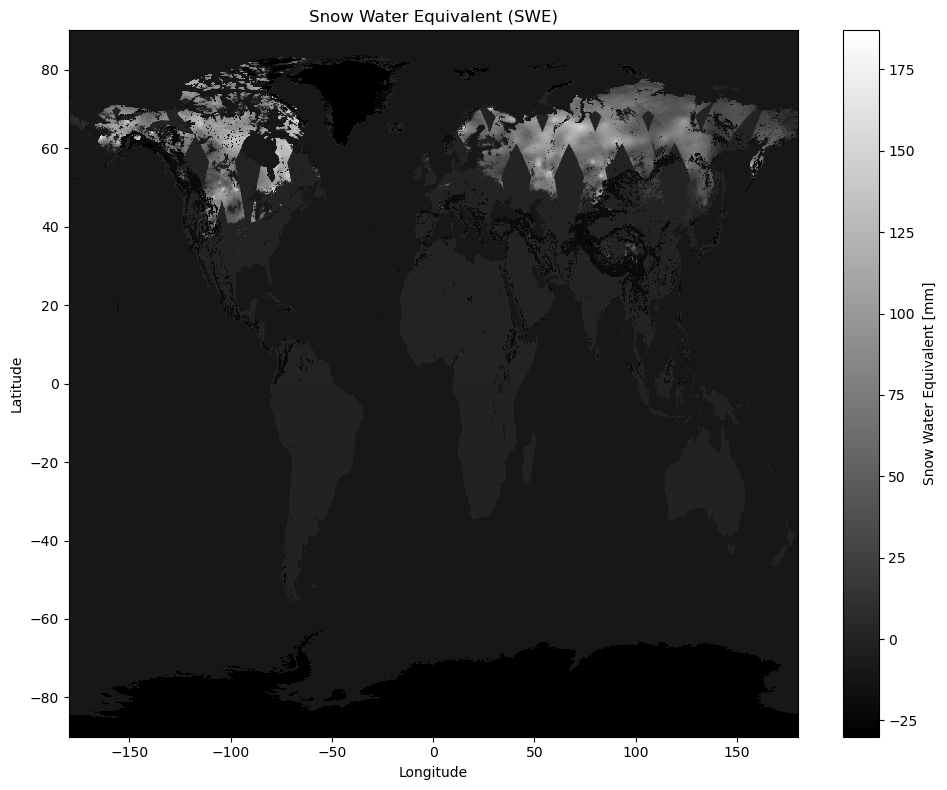

In [7]:
plot_snow(swe_da.isel(time=0))

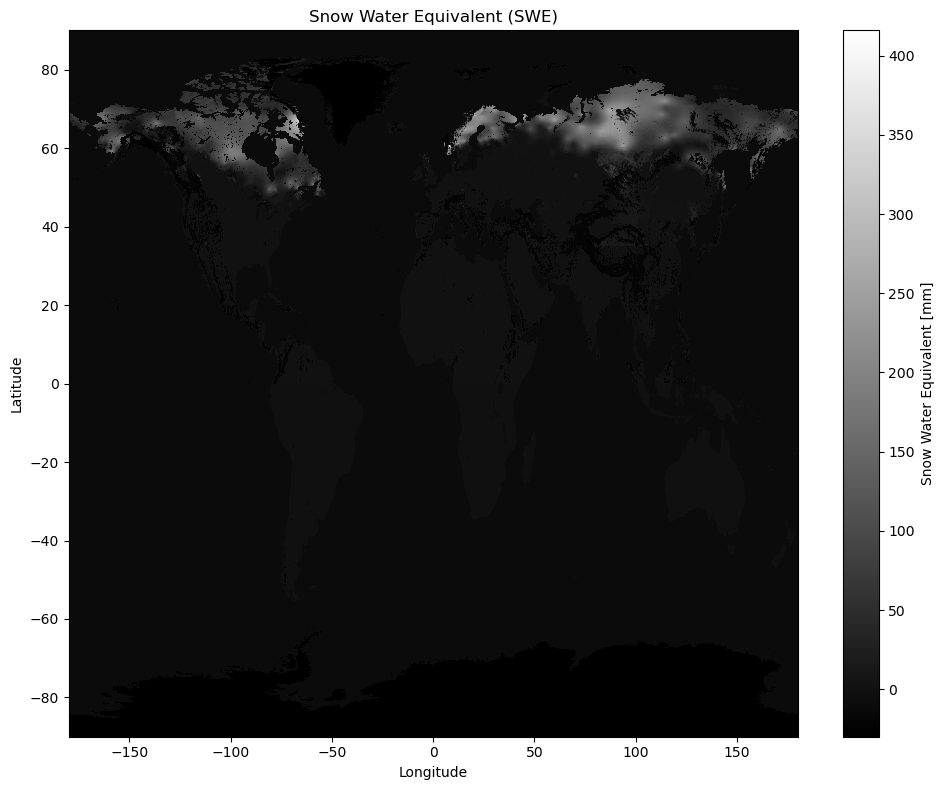

In [8]:
plot_snow(swe_da.isel(time=1000))

## Snow over UK

In [9]:
swe_uk_da = swe_da.sel({
    "lat": slice(49.959999905, 58.6350001085),
    "lon": slice(-7.57216793459, 1.68153079591)
})
swe_uk_da

<xarray.DataArray 'swe' (time: 7934, lat: 86, lon: 93)> Size: 508MB
dask.array<getitem, shape=(7934, 86, 93), dtype=float64, chunksize=(10, 86, 76), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 688B 50.05 50.15 50.25 50.35 ... 58.35 58.45 58.55
  * lon      (lon) float64 744B -7.55 -7.45 -7.35 -7.25 ... 1.35 1.45 1.55 1.65
  * time     (time) datetime64[ns] 63kB 1979-01-02 1979-01-04 ... 2020-05-24
Attributes:
    actual_range:         [1, 187]
    ancillary_variables:  swe_std
    flag_meanings:        Glacier Mountain Water no_data no_snow
    flag_values:          [-30, -20, -10, -1, 0]
    grid_mapping:         spatial_ref
    long_name:            Snow Water Equivalent
    units:                mm
    valid_range:          [1, 500]

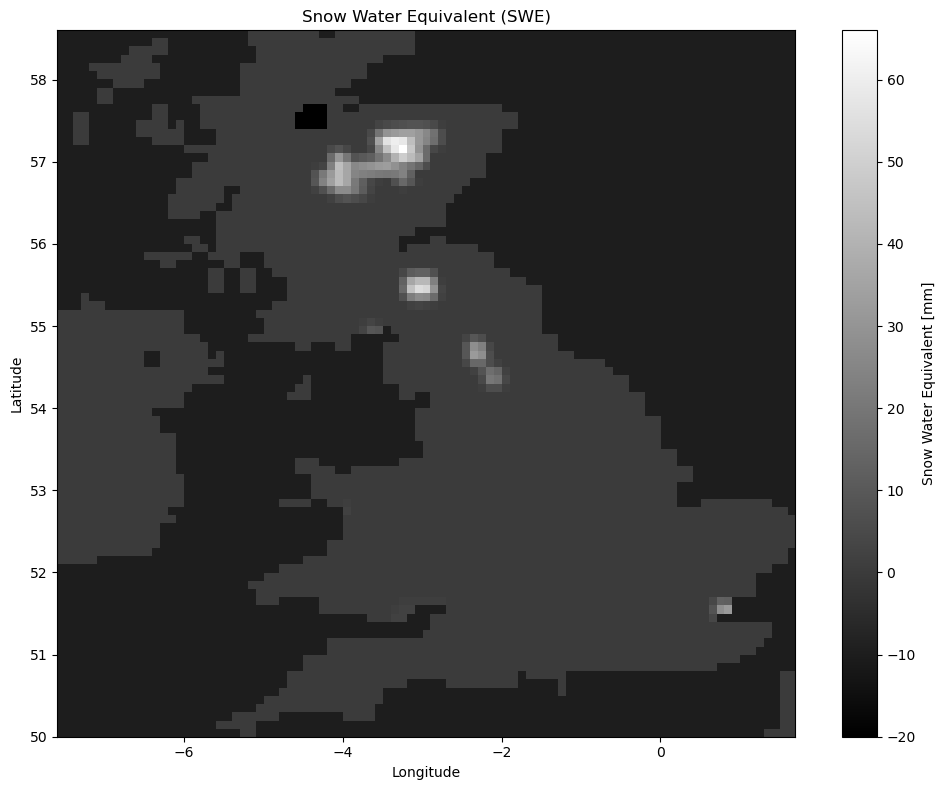

In [10]:
plot_snow(swe_uk_da.isel(time=0))

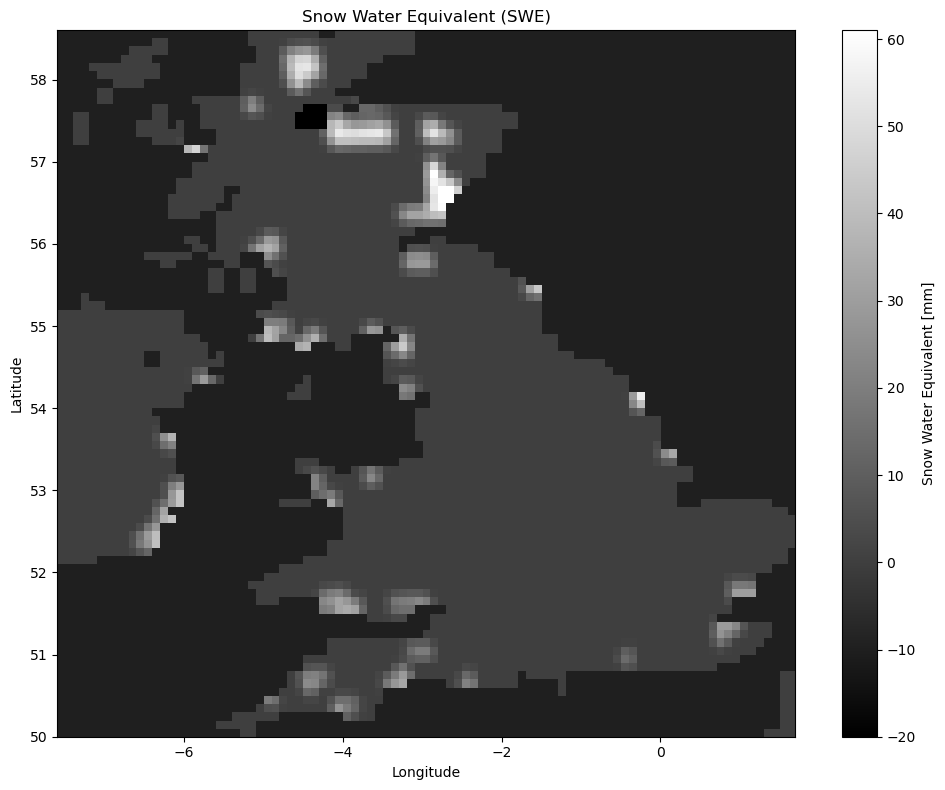

In [11]:
plot_snow(swe_uk_da.isel(time=1000))

## Find bounding box of areas using OvertureMaps and Duckdb

In [12]:
import duckdb

In [13]:
duckdb.sql("INSTALL SPATIAL")

In [14]:
duckdb.sql("LOAD SPATIAL")

In [15]:
duckdb.sql(
"""
CREATE OR REPLACE VIEW division_area AS
SELECT
    *
FROM
    read_parquet('s3://overturemaps-us-west-2/release/2025-07-23.0/theme=divisions/type=division_area/*', 
                 hive_partitioning=1)
""")

In [16]:
duckdb.sql(
"""
SELECT id,bbox
FROM division_area
WHERE id='58a34fa4-bc76-476e-81a8-1ed8a5cd693f' -- edinburgh
"""
).show()

┌──────────────────────────────────────┬───────────────────────────────────────────────────────────────────────────────┐
│                  id                  │                                     bbox                                      │
│               varchar                │            struct(xmin float, xmax float, ymin float, ymax float)             │
├──────────────────────────────────────┼───────────────────────────────────────────────────────────────────────────────┤
│ 58a34fa4-bc76-476e-81a8-1ed8a5cd693f │ {'xmin': -3.4495325, 'xmax': -3.077676, 'ymin': 55.819736, 'ymax': 56.001587} │
└──────────────────────────────────────┴───────────────────────────────────────────────────────────────────────────────┘



In [17]:
swe_edin_da = swe_da.sel({
    "lat": slice(55.819736, 56.001587),
    "lon": slice(-3.4495325, -3.077676)
})
swe_edin_da

<xarray.DataArray 'swe' (time: 7934, lat: 2, lon: 3)> Size: 381kB
dask.array<getitem, shape=(7934, 2, 3), dtype=float64, chunksize=(10, 2, 3), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 16B 55.85 55.95
  * lon      (lon) float64 24B -3.35 -3.25 -3.15
  * time     (time) datetime64[ns] 63kB 1979-01-02 1979-01-04 ... 2020-05-24
Attributes:
    actual_range:         [1, 187]
    ancillary_variables:  swe_std
    flag_meanings:        Glacier Mountain Water no_data no_snow
    flag_values:          [-30, -20, -10, -1, 0]
    grid_mapping:         spatial_ref
    long_name:            Snow Water Equivalent
    units:                mm
    valid_range:          [1, 500]

In [18]:
duckdb.sql(
"""
SELECT id,bbox
FROM division_area
WHERE id='32883d55-acaa-492e-94eb-fe8335ee5169' -- ronneburg
"""
).show()

┌──────────────────────────────────────┬───────────────────────────────────────────────────────────────────────────┐
│                  id                  │                                   bbox                                    │
│               varchar                │          struct(xmin float, xmax float, ymin float, ymax float)           │
├──────────────────────────────────────┼───────────────────────────────────────────────────────────────────────────┤
│ 32883d55-acaa-492e-94eb-fe8335ee5169 │ {'xmin': 12.135956, 'xmax': 12.221571, 'ymin': 50.82928, 'ymax': 50.8807} │
└──────────────────────────────────────┴───────────────────────────────────────────────────────────────────────────┘



In [19]:
swe_ronn_da = swe_da.sel({
    "lat": slice(50.82928, 50.8807),
    "lon": slice(12.135956, 12.221571)
})
swe_ronn_da

<xarray.DataArray 'swe' (time: 7934, lat: 1, lon: 1)> Size: 63kB
dask.array<getitem, shape=(7934, 1, 1), dtype=float64, chunksize=(10, 1, 1), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 8B 50.85
  * lon      (lon) float64 8B 12.15
  * time     (time) datetime64[ns] 63kB 1979-01-02 1979-01-04 ... 2020-05-24
Attributes:
    actual_range:         [1, 187]
    ancillary_variables:  swe_std
    flag_meanings:        Glacier Mountain Water no_data no_snow
    flag_values:          [-30, -20, -10, -1, 0]
    grid_mapping:         spatial_ref
    long_name:            Snow Water Equivalent
    units:                mm
    valid_range:          [1, 500]

# Plot snow over time

In [20]:
def plot_snow_over_time(da, window_size_in_days=365):
    noflags_da = da.where(da >= 0)
    area_avg = noflags_da.mean(dim=['lat', 'lon'], skipna=True)

    area_avg.plot.line(marker='.', figsize=(12, 4))
    plt.ylabel("Average SWE (mm)")
    plt.title("Time series of average Snow Water Equivalent")
    plt.grid()
    plt.show()

    area_avg_rolling_avg = area_avg.rolling(time=window_size_in_days, min_periods=1, center=False).mean()

    area_avg_rolling_avg.plot.line(marker='.', figsize=(12, 4))
    plt.ylabel("Average SWE (mm)")
    plt.title("Time series of rolling yearly average Snow Water Equivalent")
    plt.grid()
    plt.show()

## Edinburgh

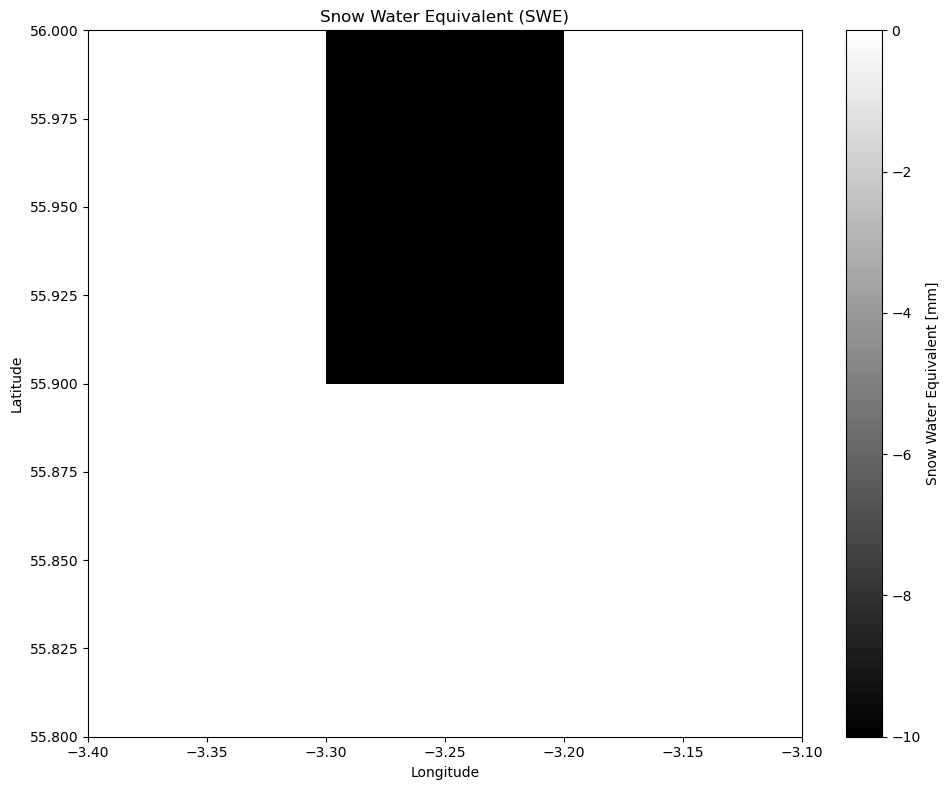

In [21]:
plot_snow(swe_edin_da.isel(time=0))

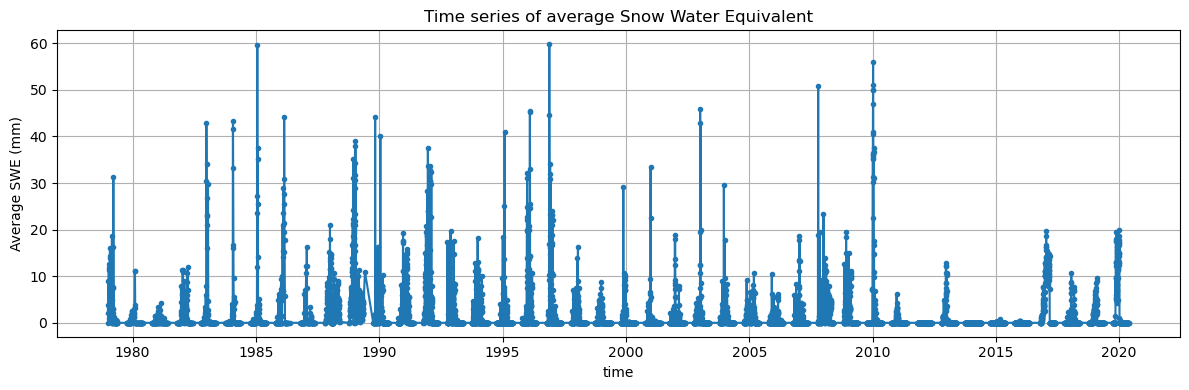

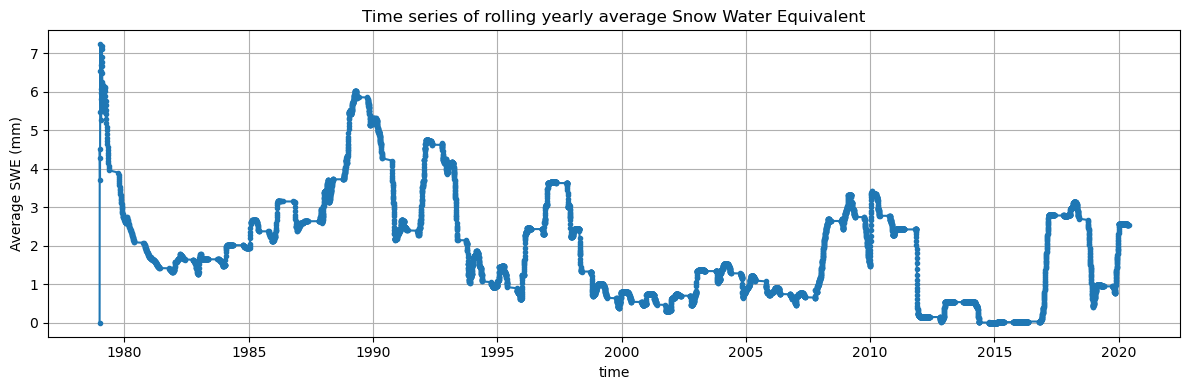

In [22]:
plot_snow_over_time(swe_edin_da)

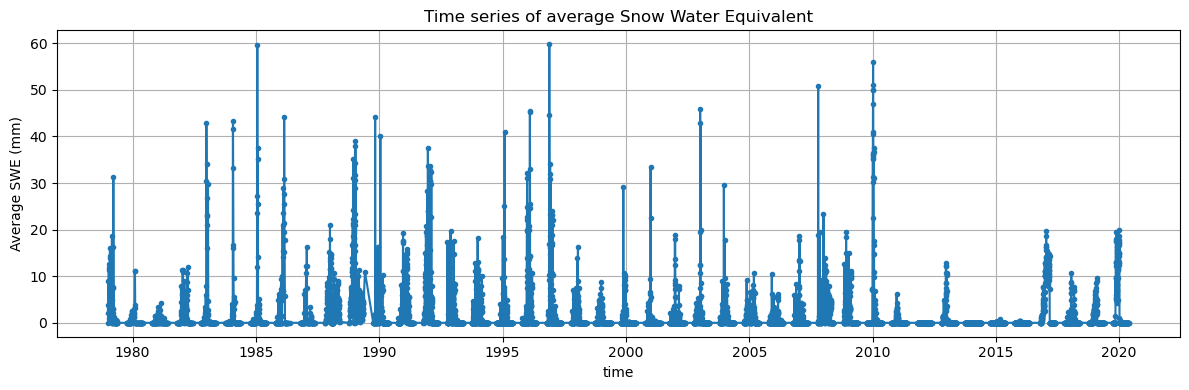

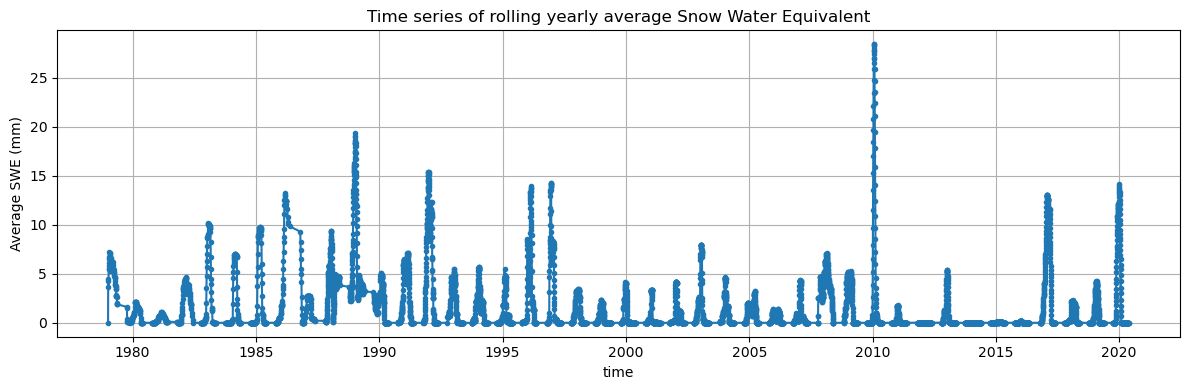

In [23]:
plot_snow_over_time(swe_edin_da, window_size_in_days=7*4)

## Ronneburg

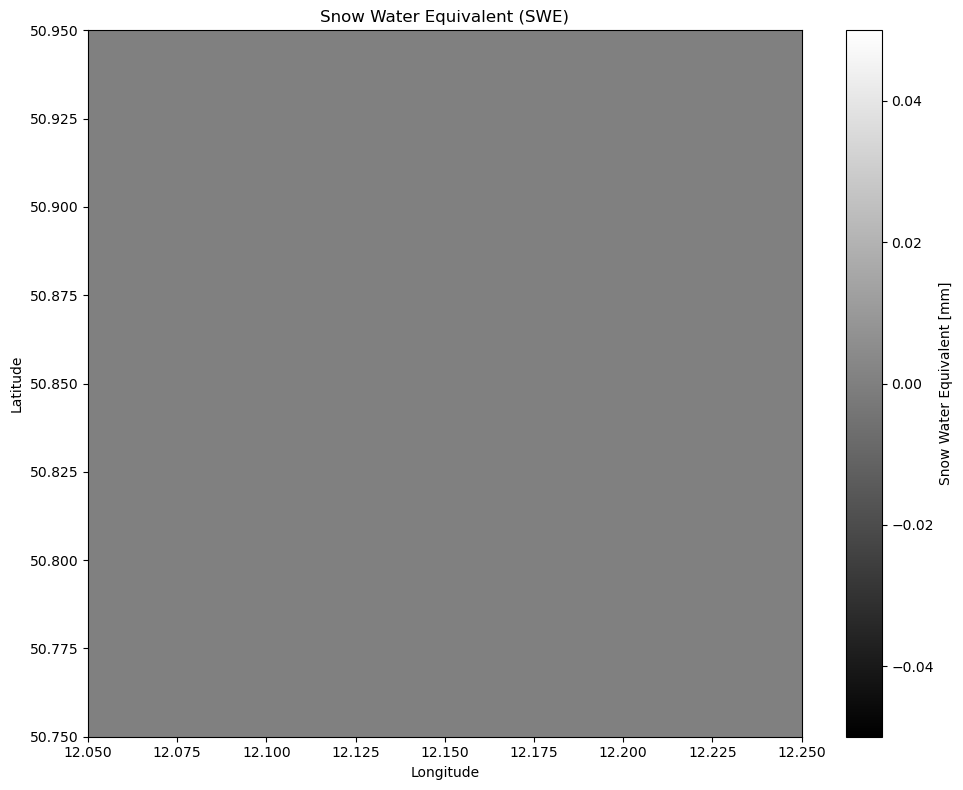

In [24]:
plot_snow(swe_ronn_da.isel(time=0))

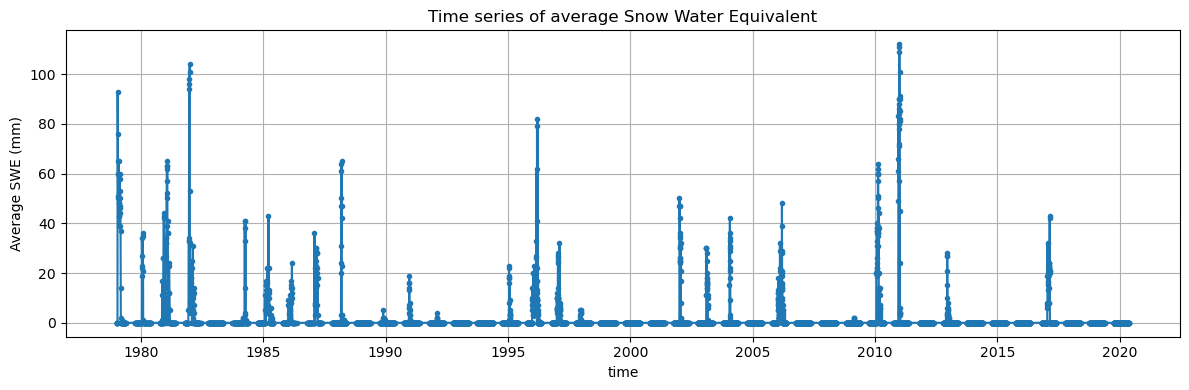

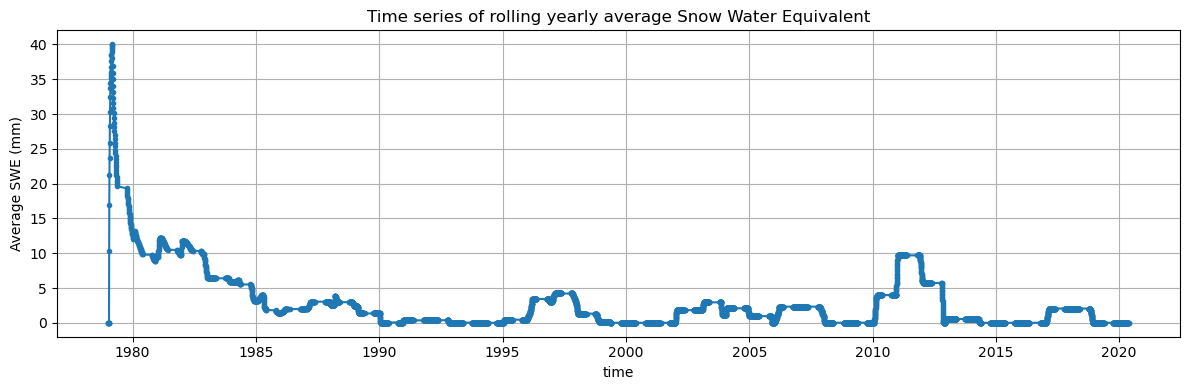

In [25]:
plot_snow_over_time(swe_ronn_da)

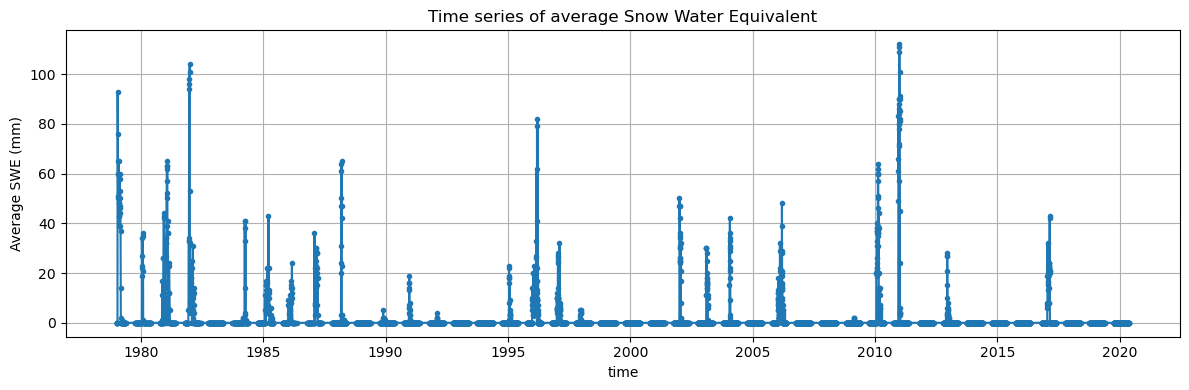

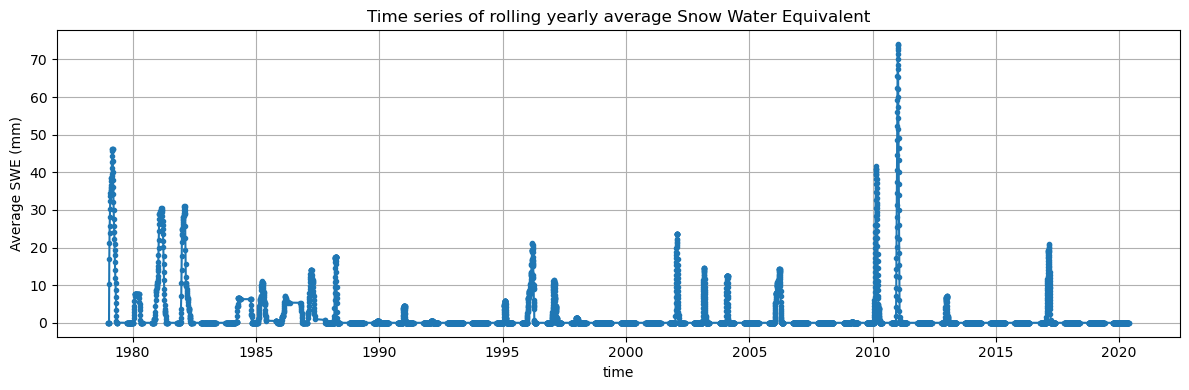

In [26]:
plot_snow_over_time(swe_ronn_da, window_size_in_days=7*4)